<a href="https://colab.research.google.com/github/Iflgit/GB_CV/blob/main/l8/8_2_Generation_GAN_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Синтез изображений. Часть 2. Генеративно-Состязательная Сеть (GAN)

## Переключение версии TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## Загрузка и подготовка датасета MNIST

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = (train_x.reshape(-1, 28*28).astype(np.float32) - 127.5) / 127.5

print(train_x.shape, train_x.dtype)
print(np.min(train_x), np.max(train_x))

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784) float32
-1.0 1.0


## Визуализация датасета MNIST

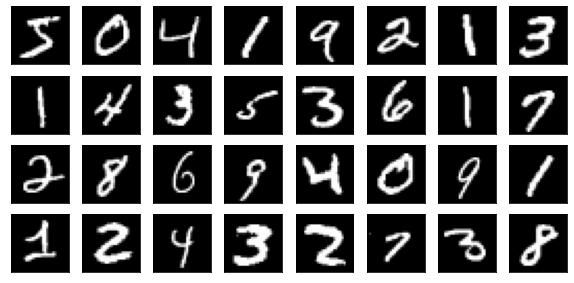

In [4]:
def plot_digits(samples):
    fig = plt.figure(figsize=(10, 10))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(8, 8, j+1)
        ax.imshow(samples[j, ...].reshape(28, 28), cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()
    
plot_digits(train_x[:32, ...])

## Создание Генератора и Дискриминатора

In [5]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.Dense(784, activation='tanh'),
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Dense(784),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(392),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1),
])

## Подготовка пайплайна данных и оптимизатора

In [6]:
INPUT_DIM = 100
NUM_EPOCHS = 5
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x)
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
sigmoid_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

## Обучение GAN

[Step  0] D Loss: 0.6219; G Loss: 0.5858


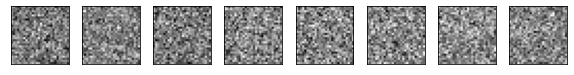

[Step 500] D Loss: 0.0786; G Loss: 6.1463


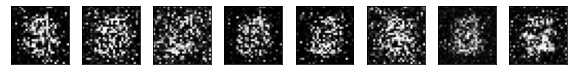

[Step 1000] D Loss: 0.1421; G Loss: 2.1224


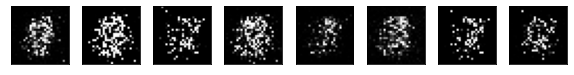

[Step 1500] D Loss: 0.3149; G Loss: 3.0700


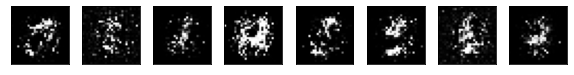

[Step 2000] D Loss: 0.1618; G Loss: 2.2932


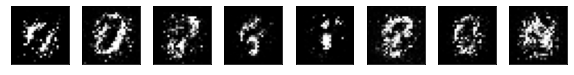

[Step 2500] D Loss: 0.4628; G Loss: 1.0282


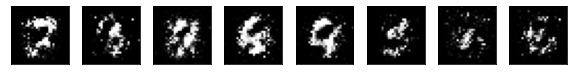

[Step 3000] D Loss: 0.5362; G Loss: 1.0445


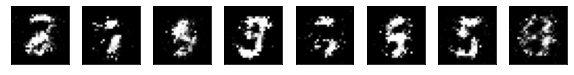

[Step 3500] D Loss: 0.5448; G Loss: 2.5132


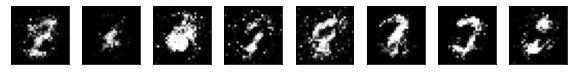

[Step 4000] D Loss: 0.4513; G Loss: 1.1065


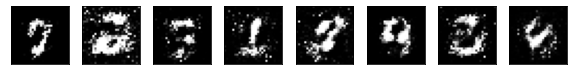

[Step 4500] D Loss: 0.4416; G Loss: 1.4445


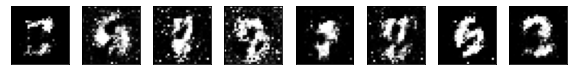

[Step 5000] D Loss: 0.7575; G Loss: 0.7230


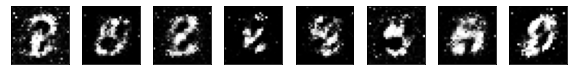

[Step 5500] D Loss: 0.4397; G Loss: 1.5286


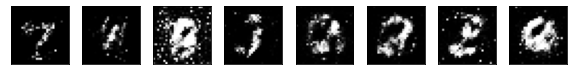

[Step 6000] D Loss: 0.3628; G Loss: 1.1381


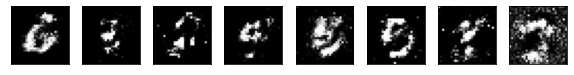

[Step 6500] D Loss: 0.4422; G Loss: 1.2263


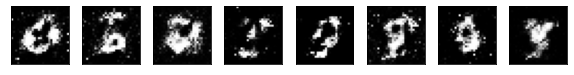

[Step 7000] D Loss: 0.6917; G Loss: 1.5145


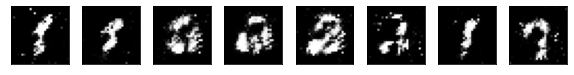

[Step 7500] D Loss: 0.6514; G Loss: 0.9404


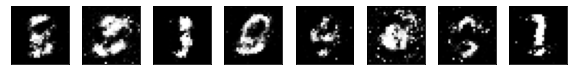

[Step 8000] D Loss: 0.5698; G Loss: 0.9775


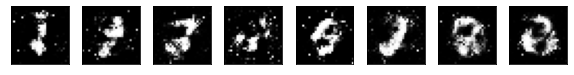

[Step 8500] D Loss: 0.4357; G Loss: 1.8330


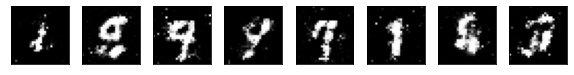

[Step 9000] D Loss: 0.5665; G Loss: 1.1747


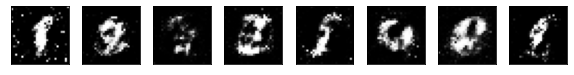

[Step 9500] D Loss: 0.5830; G Loss: 0.9574


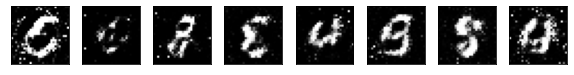

[Step 10000] D Loss: 0.6210; G Loss: 0.9038


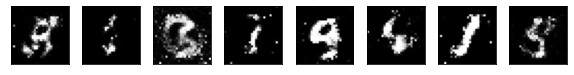

[Step 10500] D Loss: 0.4447; G Loss: 1.2096


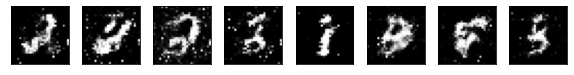

[Step 11000] D Loss: 0.5338; G Loss: 0.9479


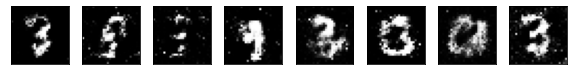

[Step 11500] D Loss: 0.5275; G Loss: 1.2613


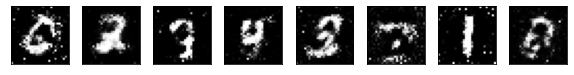

[Step 12000] D Loss: 0.4729; G Loss: 0.8724


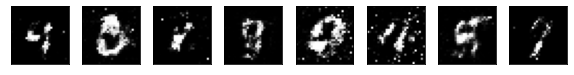

[Step 12500] D Loss: 0.6885; G Loss: 1.3725


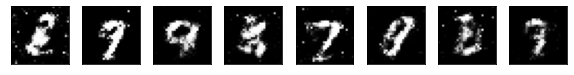

[Step 13000] D Loss: 0.6538; G Loss: 0.9268


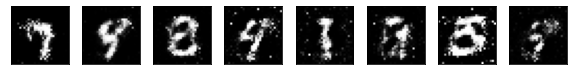

[Step 13500] D Loss: 0.3898; G Loss: 1.1041


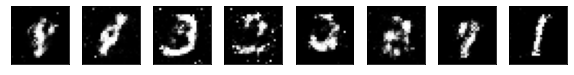

[Step 14000] D Loss: 0.4390; G Loss: 1.4815


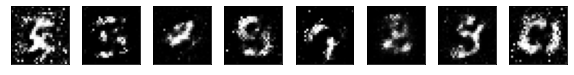

[Step 14500] D Loss: 0.5593; G Loss: 1.1678


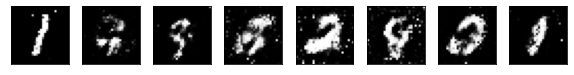

[Step 15000] D Loss: 0.5832; G Loss: 0.8425


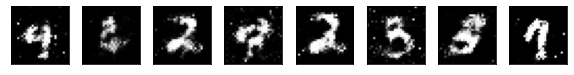

[Step 15500] D Loss: 0.5019; G Loss: 1.0314


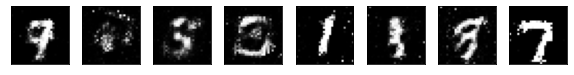

[Step 16000] D Loss: 0.7255; G Loss: 1.6400


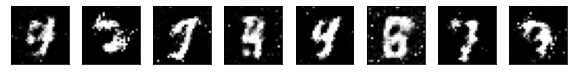

[Step 16500] D Loss: 0.4513; G Loss: 1.0948


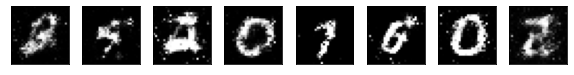

[Step 17000] D Loss: 0.6954; G Loss: 1.3745


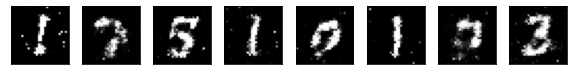

[Step 17500] D Loss: 0.5189; G Loss: 1.2569


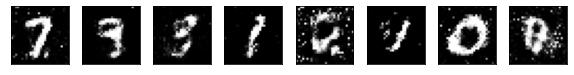

[Step 18000] D Loss: 0.5222; G Loss: 2.0373


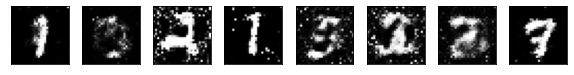

[Step 18500] D Loss: 0.5450; G Loss: 0.7605


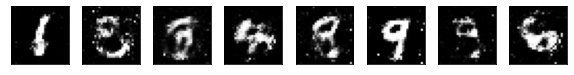

In [7]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1), np.float32), 
        np.zeros((HALF_BATCH_SIZE, 1), np.float32)))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined)
        d_loss_value = sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1), np.float32)
    
    with tf.GradientTape() as tape:
        logits = discriminator(generator(noise, training=True))
        g_loss_value = sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 500 == 0:
        print('[Step %2d] D Loss: %.4f; G Loss: %.4f' % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_digits(syntetic_images)


## Тестирование генератора

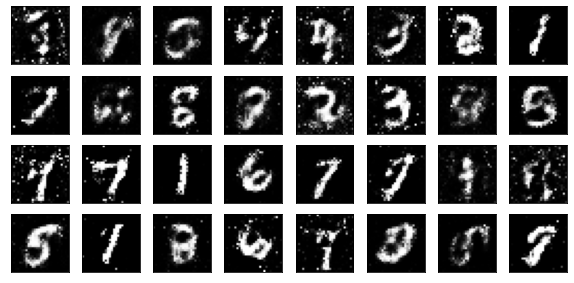

In [8]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Интерполяция в латентном пространстве

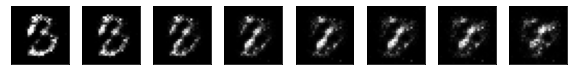

In [9]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 8)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Deep Convolutional GAN (DCGAN)

In [10]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(128*7*7, activation='relu'),
    tf.keras.layers.Reshape((7, 7, 128)),
    tf.keras.layers.UpSampling2D((2, 2)),    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.ReLU(),    
    tf.keras.layers.UpSampling2D((2, 2)),    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.ReLU(),    
    tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='tanh'),
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Dropout(0.25),    
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=(2, 2), padding='same'),
    tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1))),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),
])

In [11]:
INPUT_DIM = 100
NUM_EPOCHS = 2
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x.reshape(-1, 28, 28, 1))
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
sigmoid_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

[Step  0] D Loss: 0.6473; G Loss: 0.6909


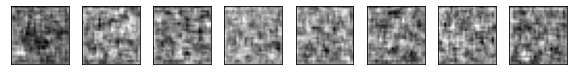

[Step 200] D Loss: 0.4837; G Loss: 2.1208


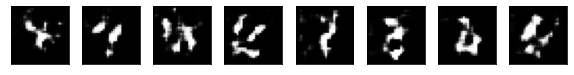

[Step 400] D Loss: 0.5340; G Loss: 0.9996


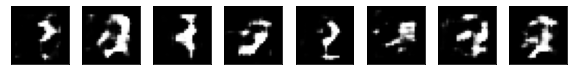

[Step 600] D Loss: 0.6738; G Loss: 1.0251


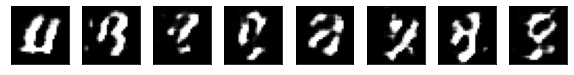

[Step 800] D Loss: 0.8232; G Loss: 0.8334


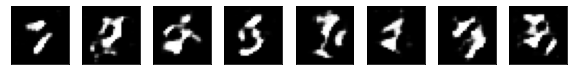

[Step 1000] D Loss: 0.7128; G Loss: 1.0942


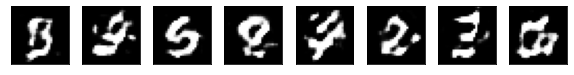

[Step 1200] D Loss: 0.4861; G Loss: 0.8521


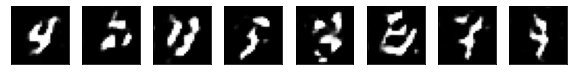

[Step 1400] D Loss: 0.5799; G Loss: 0.8780


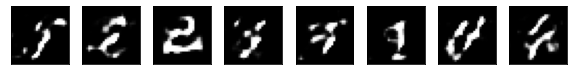

[Step 1600] D Loss: 0.6190; G Loss: 1.2991


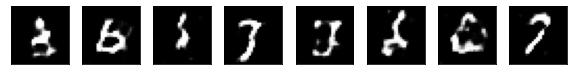

[Step 1800] D Loss: 0.6368; G Loss: 1.3916


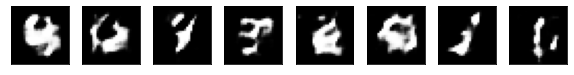

[Step 2000] D Loss: 0.7310; G Loss: 1.0040


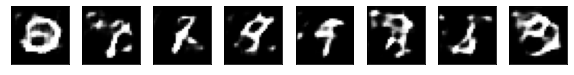

[Step 2200] D Loss: 0.5993; G Loss: 1.0161


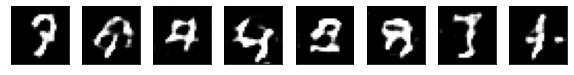

[Step 2400] D Loss: 0.6606; G Loss: 1.4209


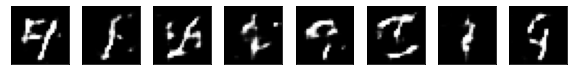

[Step 2600] D Loss: 0.7342; G Loss: 1.0368


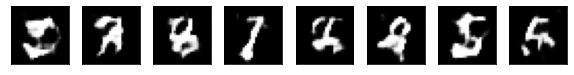

[Step 2800] D Loss: 0.5916; G Loss: 1.0627


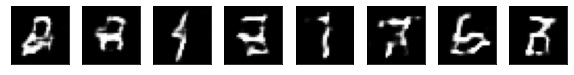

[Step 3000] D Loss: 0.6101; G Loss: 1.2009


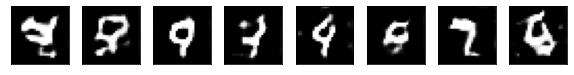

[Step 3200] D Loss: 0.6578; G Loss: 1.2430


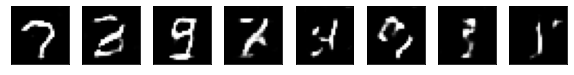

[Step 3400] D Loss: 0.5934; G Loss: 0.9429


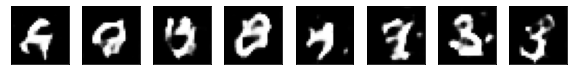

[Step 3600] D Loss: 0.6971; G Loss: 1.0934


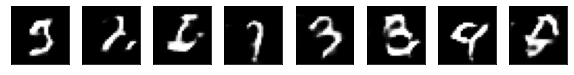

[Step 3800] D Loss: 0.6221; G Loss: 1.0694


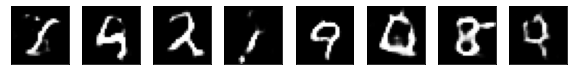

[Step 4000] D Loss: 0.7556; G Loss: 0.8059


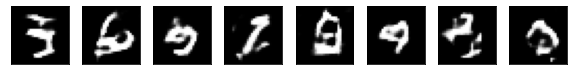

[Step 4200] D Loss: 0.6893; G Loss: 0.9563


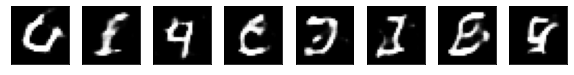

[Step 4400] D Loss: 0.6365; G Loss: 0.8147


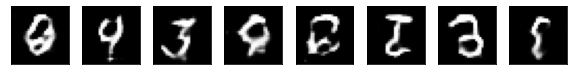

[Step 4600] D Loss: 0.6547; G Loss: 0.8497


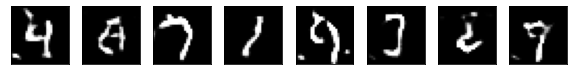

[Step 4800] D Loss: 0.6756; G Loss: 0.9515


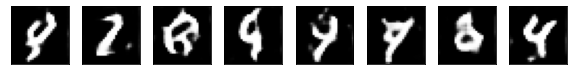

[Step 5000] D Loss: 0.8304; G Loss: 0.8032


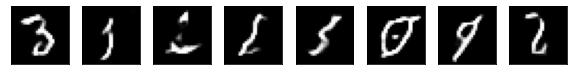

[Step 5200] D Loss: 0.5402; G Loss: 1.0235


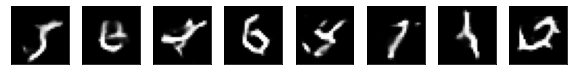

[Step 5400] D Loss: 0.7943; G Loss: 0.7648


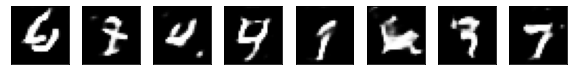

[Step 5600] D Loss: 0.7503; G Loss: 0.9841


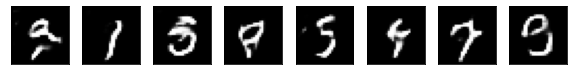

[Step 5800] D Loss: 0.5533; G Loss: 0.8321


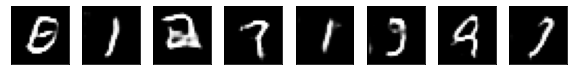

[Step 6000] D Loss: 0.6480; G Loss: 0.7837


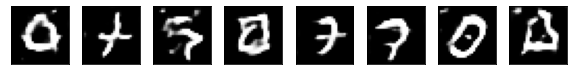

[Step 6200] D Loss: 0.6420; G Loss: 0.9211


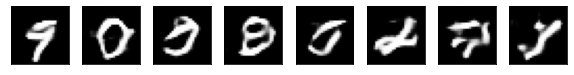

[Step 6400] D Loss: 0.6861; G Loss: 0.7714


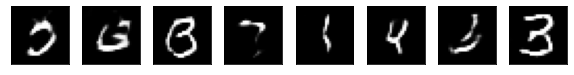

[Step 6600] D Loss: 0.7328; G Loss: 0.8506


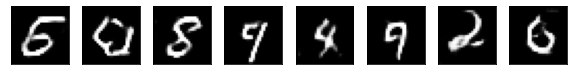

[Step 6800] D Loss: 0.7467; G Loss: 0.8122


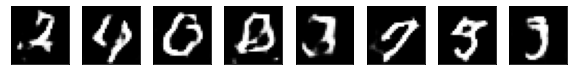

[Step 7000] D Loss: 0.6613; G Loss: 1.0436


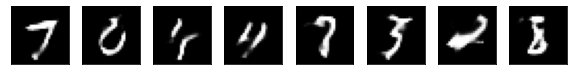

[Step 7200] D Loss: 0.6824; G Loss: 0.8937


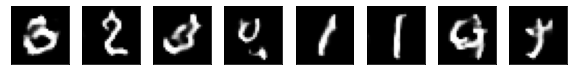

[Step 7400] D Loss: 0.5415; G Loss: 0.8464


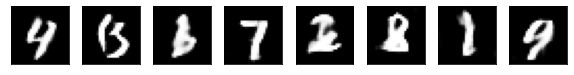

In [12]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1), np.float32), 
        np.zeros((HALF_BATCH_SIZE, 1), np.float32)))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined, training=True)
        d_loss_value = sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1), np.float32)
    
    with tf.GradientTape() as tape:
        syntetic = generator(noise, training=True)
        logits = discriminator(syntetic, training=False)
        g_loss_value = sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 200 == 0:
        print('[Step %2d] D Loss: %.4f; G Loss: %.4f' % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_digits(syntetic_images)


## Тестирование свёрточного генератора

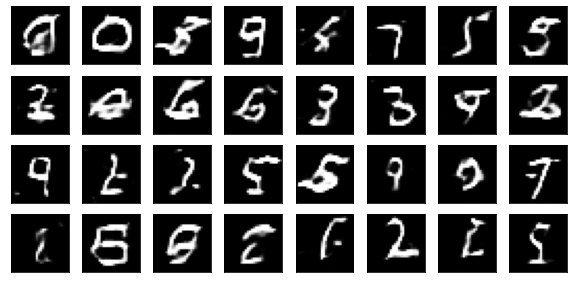

In [13]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Интерполяция в латентном пространстве

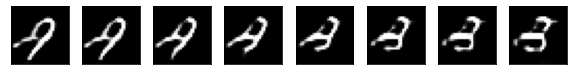

In [14]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 8)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)